In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt

import scipy.stats as spst
from scipy.optimize import minimize
import scipy.special as spsp
from statsmodels.formula.api import ols
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
link="https://drive.google.com/open?id=1dN93GlOgXUfTfaDkeewbol6USNExovnJ"

_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('life.csv')  

life = pd.read_csv('life.csv')
pd.options.display.max_rows=999
life

_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')  

data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
pd.options.display.max_rows=999
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [0]:
data.shape

(9134, 24)

In [0]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [0]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# Response Rate

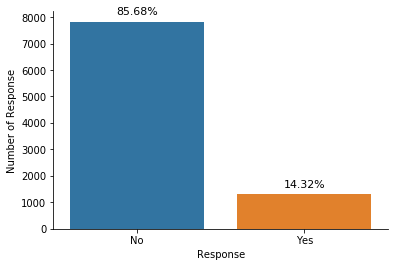

In [0]:
def annot_plot(data, ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / data.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             

ax = sns.countplot('Response',data = data)
plt.ylabel('Number of Response')
annot_plot(data, ax, 0.08,1)
plt.show()

# Response by numerical attributes

In [0]:
data.groupby('Response').mean()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Response,,,,,,,,
No,8030.022305,37509.190008,93.065040,15.165346,48.030923,0.388065,2.986583,432.084497
Yes,7854.871361,38544.027523,94.142202,14.688073,48.266055,0.362385,2.844037,446.080868


#Response by gender

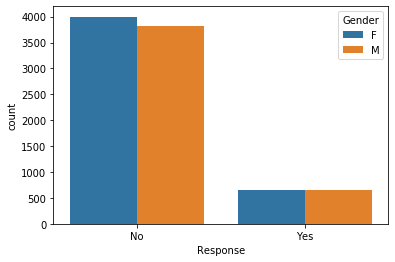

In [0]:
sns.countplot("Response", hue="Gender", data = data)

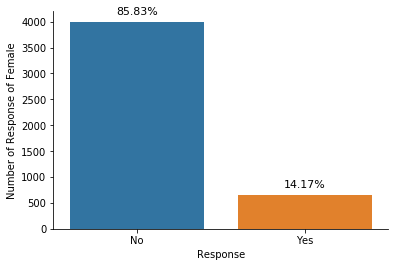

In [0]:
ax = sns.countplot('Response',data = data[data["Gender"] == "F"])
plt.ylabel('Number of Response of Female')
annot_plot(data[data["Gender"] == "F"], ax, 0.08,1)
plt.show()

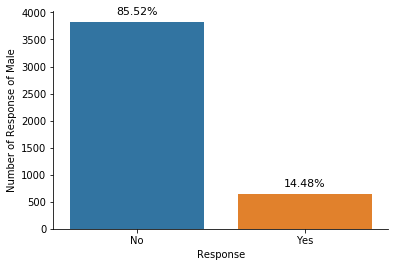

In [0]:
ax = sns.countplot('Response',data = data[data["Gender"] == "M"])
plt.ylabel('Number of Response of Male')
annot_plot(data[data["Gender"] == "M"], ax, 0.08,1)
plt.show()

# Response by education level

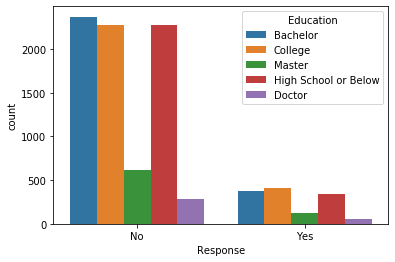

In [0]:
sns.countplot("Response", hue="Education", data = data)

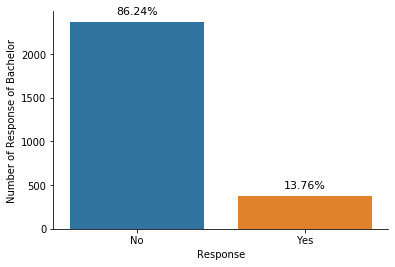

In [0]:
ax = sns.countplot('Response',data = data[data["Education"] == "Bachelor"])
plt.ylabel('Number of Response of Bachelor')
annot_plot(data[data["Education"] == "Bachelor"], ax, 0.08,1)
plt.show()

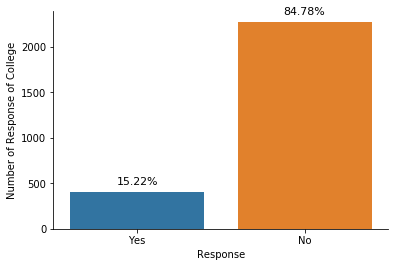

In [0]:
ax = sns.countplot('Response',data = data[data["Education"] == "College"])
plt.ylabel('Number of Response of College')
annot_plot(data[data["Education"] == "College"], ax, 0.08,1)
plt.show()

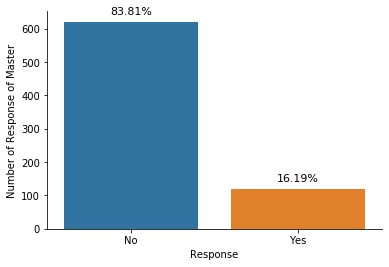

In [0]:
ax = sns.countplot('Response',data = data[data["Education"] == "Master"])
plt.ylabel('Number of Response of Master')
annot_plot(data[data["Education"] == "Master"], ax, 0.08,1)
plt.show()

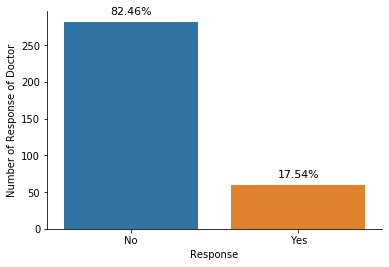

In [0]:
ax = sns.countplot('Response',data = data[data["Education"] == "Doctor"])
plt.ylabel('Number of Response of Doctor')
annot_plot(data[data["Education"] == "Doctor"], ax, 0.08,1)
plt.show()

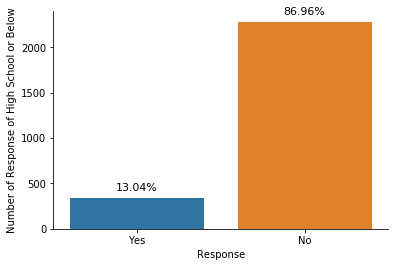

In [0]:
ax = sns.countplot('Response',data = data[data["Education"] == "High School or Below"])
plt.ylabel('Number of Response of High School or Below')
annot_plot(data[data["Education"] == "High School or Below"], ax, 0.08,1)
plt.show()

# Response by different offer type

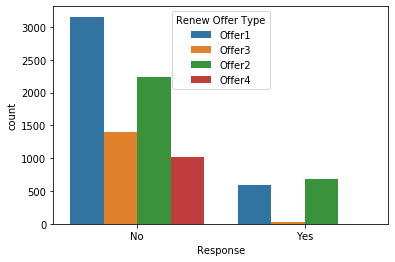

In [0]:
sns.countplot("Response", hue="Renew Offer Type", data = data)

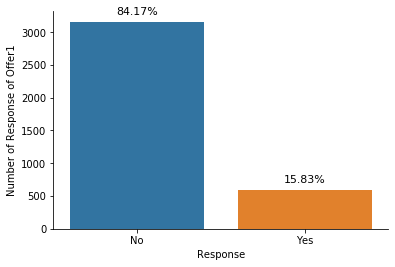

In [0]:
ax = sns.countplot('Response',data = data[data["Renew Offer Type"] == "Offer1"])
plt.ylabel('Number of Response of Offer1')
annot_plot(data[data["Renew Offer Type"] == "Offer1"], ax, 0.08,1)
plt.show()

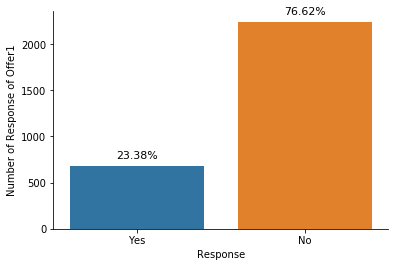

In [0]:
ax = sns.countplot('Response',data = data[data["Renew Offer Type"] == "Offer2"])
plt.ylabel('Number of Response of Offer1')
annot_plot(data[data["Renew Offer Type"] == "Offer2"], ax, 0.08,1)
plt.show()

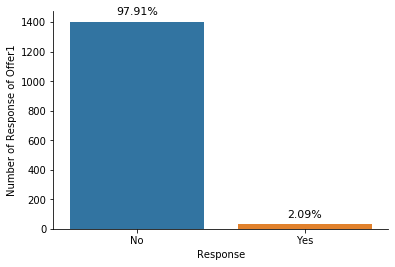

In [0]:
ax = sns.countplot('Response',data = data[data["Renew Offer Type"] == "Offer3"])
plt.ylabel('Number of Response of Offer1')
annot_plot(data[data["Renew Offer Type"] == "Offer3"], ax, 0.08,1)
plt.show()

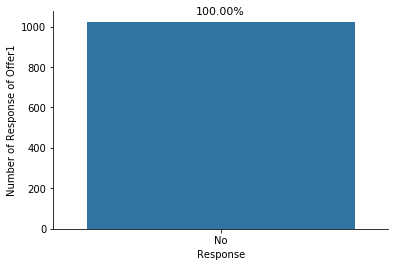

In [0]:
ax = sns.countplot('Response',data = data[data["Renew Offer Type"] == "Offer4"])
plt.ylabel('Number of Response of Offer1')
annot_plot(data[data["Renew Offer Type"] == "Offer4"], ax, 0.08,1)
plt.show()

# Response by Marital Status



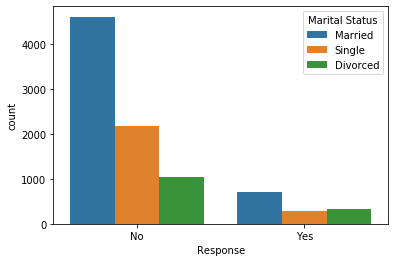

In [0]:
sns.countplot("Response", hue="Marital Status", data = data)

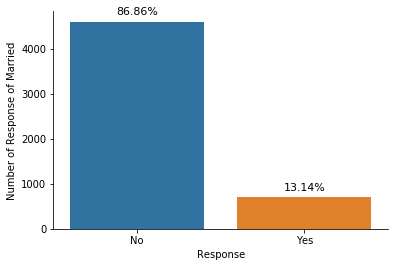

In [0]:
ax = sns.countplot('Response',data = data[data["Marital Status"] == "Married"])
plt.ylabel('Number of Response of Married')
annot_plot(data[data["Marital Status"] == "Married"], ax, 0.08,1)
plt.show()

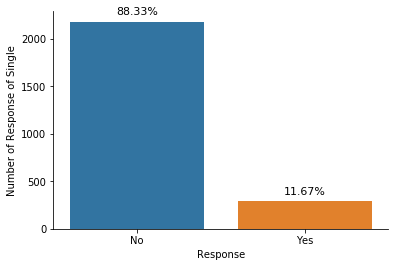

In [0]:
ax = sns.countplot('Response',data = data[data["Marital Status"] == "Single"])
plt.ylabel('Number of Response of Single')
annot_plot(data[data["Marital Status"] == "Single"], ax, 0.08,1)
plt.show()

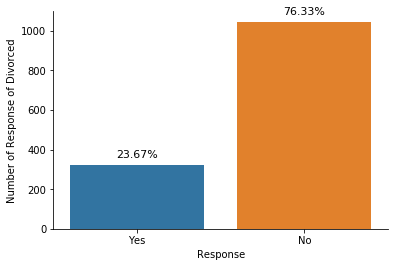

In [0]:
ax = sns.countplot('Response',data = data[data["Marital Status"] == "Divorced"])
plt.ylabel('Number of Response of Divorced')
annot_plot(data[data["Marital Status"] == "Divorced"], ax, 0.08,1)
plt.show()

In [0]:
data.groupby(['Response','Marital Status']).count()

Customer  State  ...  Vehicle Class  Vehicle Size
Response Marital Status                   ...                             
No       Divorced            1045   1045  ...           1045          1045
         Married             4602   4602  ...           4602          4602
         Single              2179   2179  ...           2179          2179
Yes      Divorced             324    324  ...            324           324
         Married              696    696  ...            696           696
         Single               288    288  ...            288           288

[6 rows x 22 columns]

# Response by Employment Status

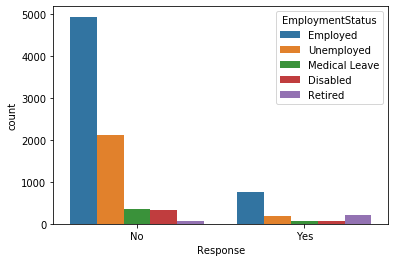

In [0]:
sns.countplot("Response", hue="EmploymentStatus", data = data)

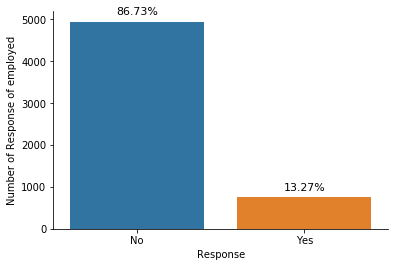

In [0]:
ax = sns.countplot('Response',data = data[data["EmploymentStatus"] == "Employed"])
plt.ylabel('Number of Response of employed')
annot_plot(data[data["EmploymentStatus"] == "Employed"], ax, 0.08,1)
plt.show()

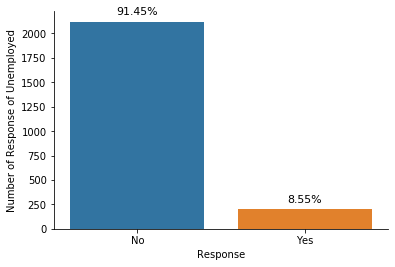

In [0]:
ax = sns.countplot('Response',data = data[data["EmploymentStatus"] == "Unemployed"])
plt.ylabel('Number of Response of Unemployed')
annot_plot(data[data["EmploymentStatus"] == "Unemployed"], ax, 0.08,1)
plt.show()

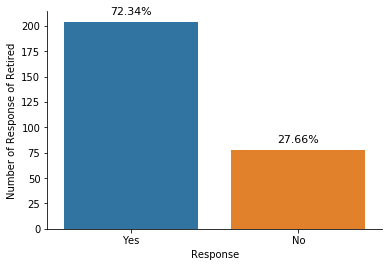

In [0]:
ax = sns.countplot('Response',data = data[data["EmploymentStatus"] == "Retired"])
plt.ylabel('Number of Response of Retired')
annot_plot(data[data["EmploymentStatus"] == "Retired"], ax, 0.08,1)
plt.show()

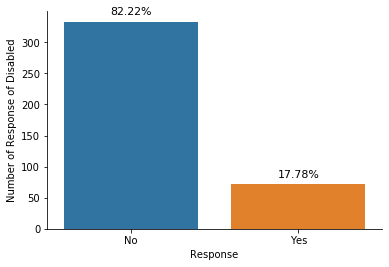

In [0]:
ax = sns.countplot('Response',data = data[data["EmploymentStatus"] == "Disabled"])
plt.ylabel('Number of Response of Disabled')
annot_plot(data[data["EmploymentStatus"] == "Disabled"], ax, 0.08,1)
plt.show()

# Response by Coverage

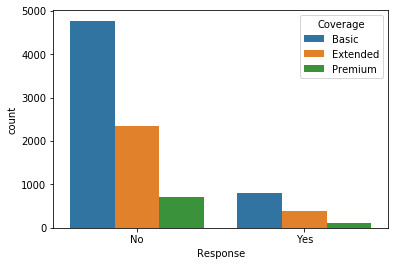

In [0]:
sns.countplot("Response", hue="Coverage", data = data)

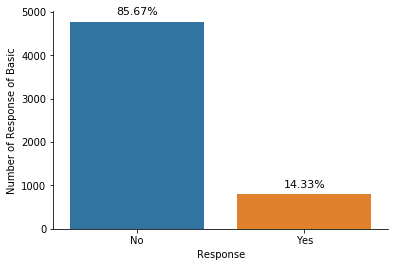

In [0]:
ax = sns.countplot('Response',data = data[data["Coverage"] == "Basic"])
plt.ylabel('Number of Response of Basic')
annot_plot(data[data["Coverage"] == 'Basic'], ax, 0.08,1)
plt.show()

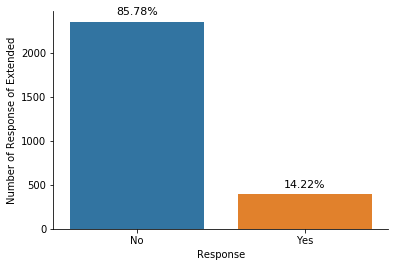

In [0]:
ax = sns.countplot('Response',data = data[data["Coverage"] == "Extended"])
plt.ylabel('Number of Response of Extended')
annot_plot(data[data["Coverage"] == 'Extended'], ax, 0.08,1)
plt.show()

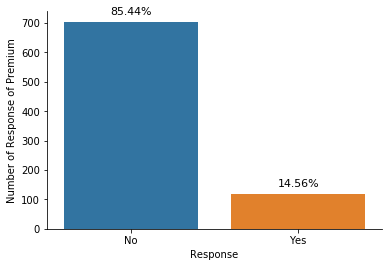

In [0]:
ax = sns.countplot('Response',data = data[data["Coverage"] == "Premium"])
plt.ylabel('Number of Response of Premium')
annot_plot(data[data["Coverage"] == 'Premium'], ax, 0.08,1)
plt.show()

# Response by Location Code

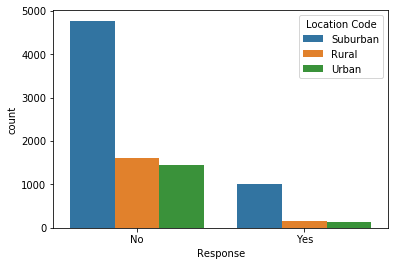

In [0]:
sns.countplot("Response", hue="Location Code", data = data)

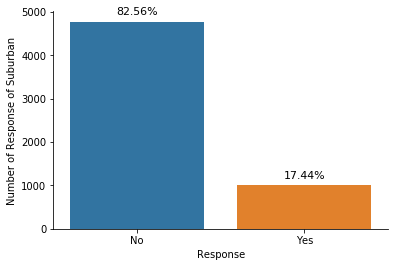

In [0]:
ax = sns.countplot('Response',data = data[data["Location Code"] == "Suburban"])
plt.ylabel('Number of Response of Suburban')
annot_plot(data[data["Location Code"] == 'Suburban'], ax, 0.08,1)
plt.show()

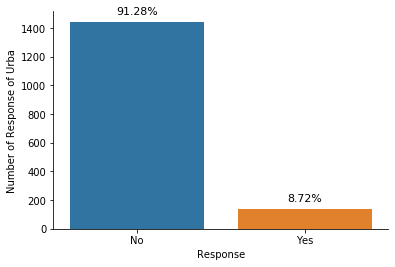

In [0]:
ax = sns.countplot('Response',data = data[data["Location Code"] == "Urban"])
plt.ylabel('Number of Response of Urba')
annot_plot(data[data["Location Code"] == 'Urban'], ax, 0.08,1)
plt.show()

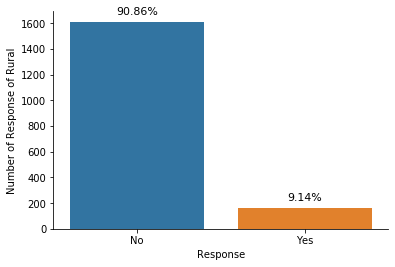

In [0]:
ax = sns.countplot('Response',data = data[data["Location Code"] == "Rural"])
plt.ylabel('Number of Response of Rural')
annot_plot(data[data["Location Code"] == 'Rural'], ax, 0.08,1)
plt.show()

# Response by Policy Type

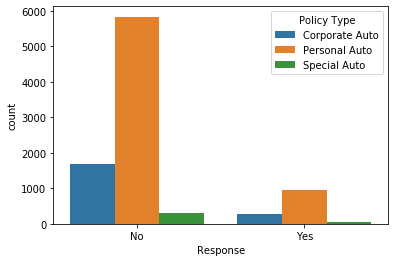

In [0]:
sns.countplot("Response", hue="Policy Type", data = data)

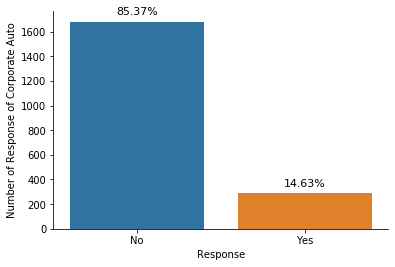

In [0]:
ax = sns.countplot('Response',data = data[data["Policy Type"] == "Corporate Auto"])
plt.ylabel('Number of Response of Corporate Auto')
annot_plot(data[data["Policy Type"] == 'Corporate Auto'], ax, 0.08,1)
plt.show()

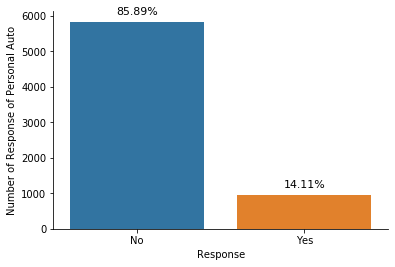

In [0]:
ax = sns.countplot('Response',data = data[data["Policy Type"] == "Personal Auto"])
plt.ylabel('Number of Response of Personal Auto')
annot_plot(data[data["Policy Type"] == 'Personal Auto'], ax, 0.08,1)
plt.show()

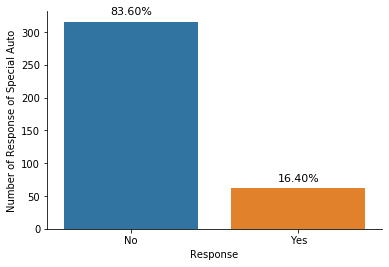

In [0]:
ax = sns.countplot('Response',data = data[data["Policy Type"] == "Special Auto"])
plt.ylabel('Number of Response of Special Auto')
annot_plot(data[data["Policy Type"] == 'Special Auto'], ax, 0.08,1)
plt.show()

# Response by Vehicle Class

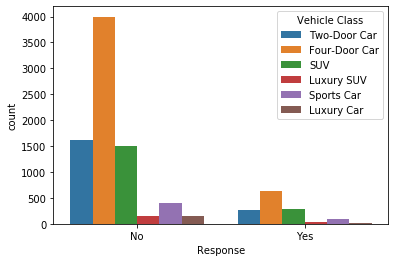

In [0]:
sns.countplot("Response", hue="Vehicle Class", data = data)

# Response by sales channel

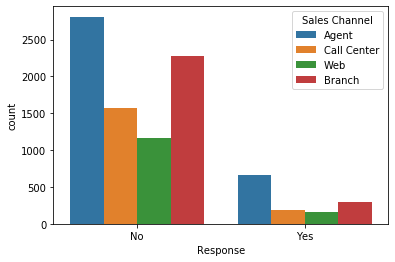

In [0]:
sns.countplot("Response", hue="Sales Channel", data = data)

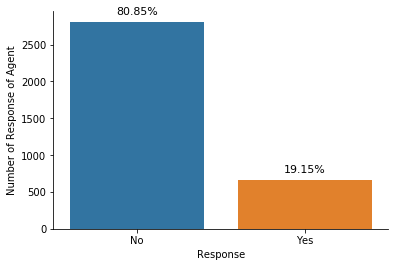

In [0]:
ax = sns.countplot('Response',data = data[data["Sales Channel"] == "Agent"])
plt.ylabel('Number of Response of Agent')
annot_plot(data[data["Sales Channel"] == 'Agent'], ax, 0.08,1)
plt.show()

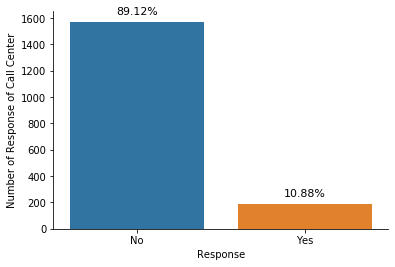

In [0]:
ax = sns.countplot('Response',data = data[data["Sales Channel"] == "Call Center"])
plt.ylabel('Number of Response of Call Center')
annot_plot(data[data["Sales Channel"] == 'Call Center'], ax, 0.08,1)
plt.show()

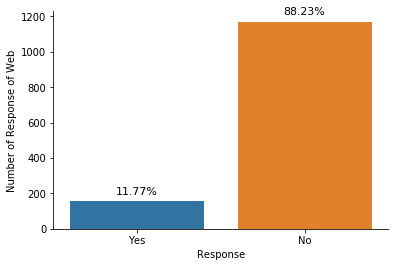

In [0]:
ax = sns.countplot('Response',data = data[data["Sales Channel"] == "Web"])
plt.ylabel('Number of Response of Web')
annot_plot(data[data["Sales Channel"] == 'Web'], ax, 0.08,1)
plt.show()

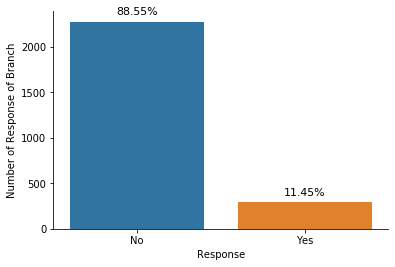

In [0]:
ax = sns.countplot('Response',data = data[data["Sales Channel"] == "Branch"])
plt.ylabel('Number of Response of Branch')
annot_plot(data[data["Sales Channel"] == 'Branch'], ax, 0.08,1)
plt.show()

# Response by Vehicle size

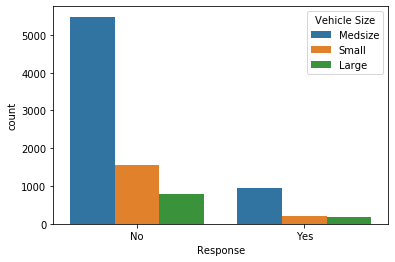

In [0]:
sns.countplot("Response", hue="Vehicle Size", data = data)

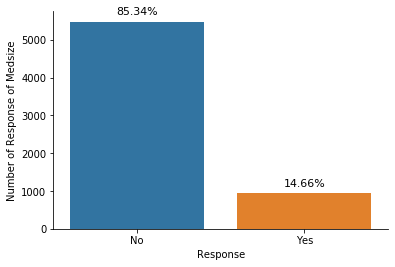

In [0]:
ax = sns.countplot('Response',data = data[data["Vehicle Size"] == "Medsize"])
plt.ylabel('Number of Response of Medsize')
annot_plot(data[data["Vehicle Size"] == 'Medsize'], ax, 0.08,1)
plt.show()

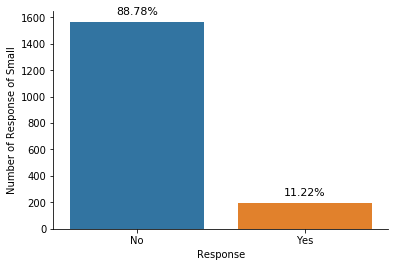

In [0]:
ax = sns.countplot('Response',data = data[data["Vehicle Size"] == "Small"])
plt.ylabel('Number of Response of Small')
annot_plot(data[data["Vehicle Size"] == 'Small'], ax, 0.08,1)
plt.show()

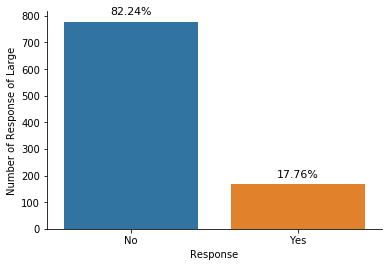

In [0]:
ax = sns.countplot('Response',data = data[data["Vehicle Size"] == "Large"])
plt.ylabel('Number of Response of Large')
annot_plot(data[data["Vehicle Size"] == 'Large'], ax, 0.08,1)
plt.show()

# How does company assign different offers to different customers?


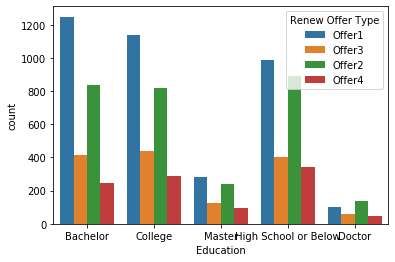

In [0]:
sns.countplot("Education", hue="Renew Offer Type", data = data)

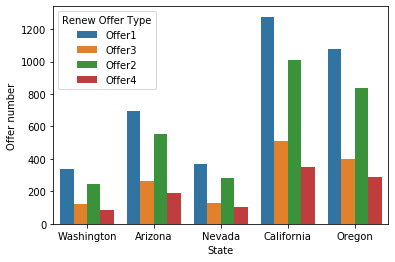

In [0]:
ax = sns.countplot('State',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# seems uncorrelated

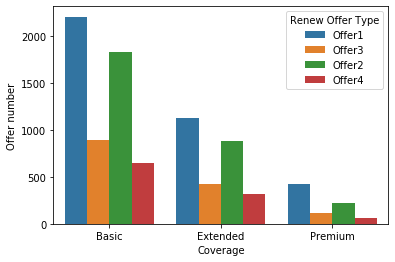

In [0]:
ax = sns.countplot('Coverage',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# seems uncorrelated

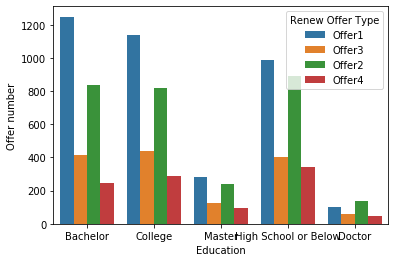

In [0]:
ax = sns.countplot('Education',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# correlated

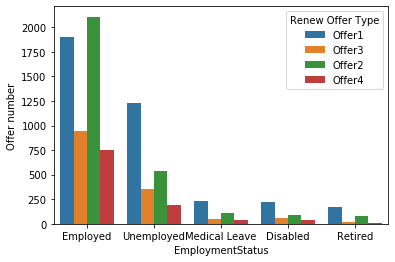

In [0]:
ax = sns.countplot('EmploymentStatus',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# correlated

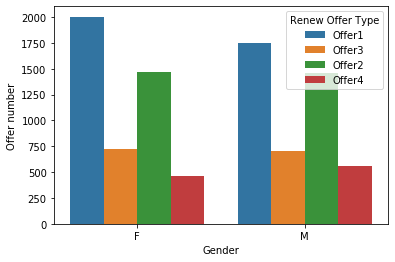

In [0]:
ax = sns.countplot('Gender',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# seems uncorrelated

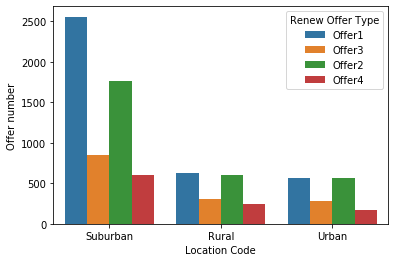

In [0]:
ax = sns.countplot('Location Code',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# related

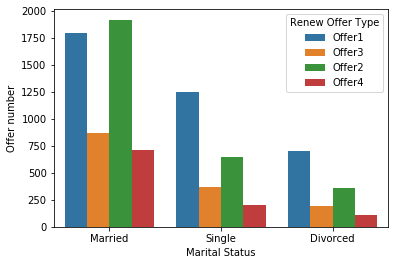

In [0]:
ax = sns.countplot('Marital Status',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# correlated

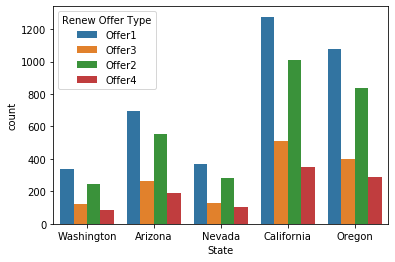

In [0]:
sns.countplot("State", hue="Renew Offer Type", data = data)

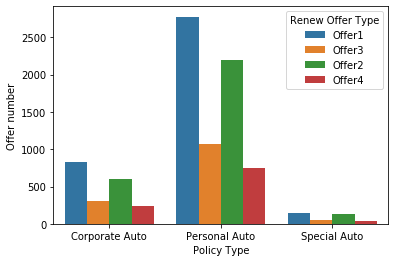

In [0]:
ax = sns.countplot('Policy Type',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# correlated

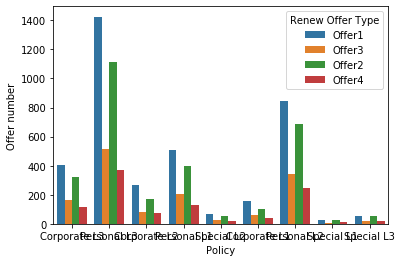

In [0]:
ax = sns.countplot('Policy',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# seems uncorrelated

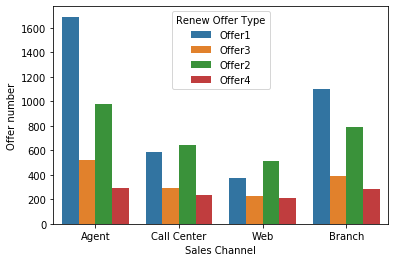

In [0]:
ax = sns.countplot('Sales Channel',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# correlated

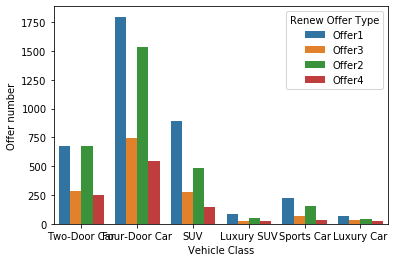

In [0]:
ax = sns.countplot('Vehicle Class',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# correlated

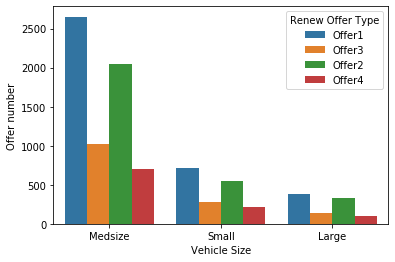

In [0]:
ax = sns.countplot('Vehicle Size',hue = 'Renew Offer Type' ,data = data)
plt.ylabel('Offer number')
plt.show()

# seems uncorrelated

In [0]:
data.groupby('Renew Offer Type').mean()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Renew Offer Type,,,,,,,,
Offer1,8707.085583,30764.733209,96.947228,15.197495,51.442431,0.442697,3.197228,469.165640
Offer2,7396.753826,44014.951128,90.037936,15.219070,45.743336,0.320916,2.826042,408.778268
Offer3,7997.886516,38551.767458,92.458101,14.865922,47.486732,0.384777,2.967877,423.391734
Offer4,7179.947270,43495.460938,89.714844,14.703125,43.128906,0.351562,2.517578,392.847065


In [0]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
values = data["Renew Offer Type"].value_counts()
labels = values.index
colors = ['red', 'blue', 'green', "orange"]
trace = go.Pie(labels=labels, 
               values=values,
                marker=dict(colors=colors) 
              )
layout = go.Layout(title='Offer Distribution')
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

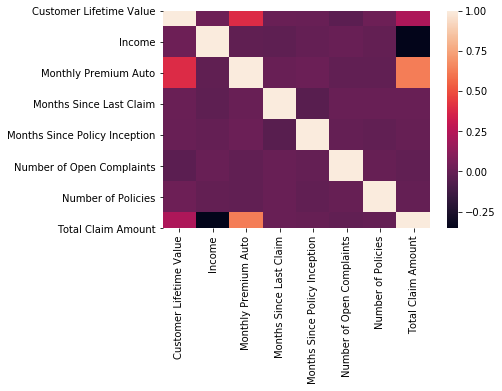

In [0]:
sns.heatmap(data.corr())

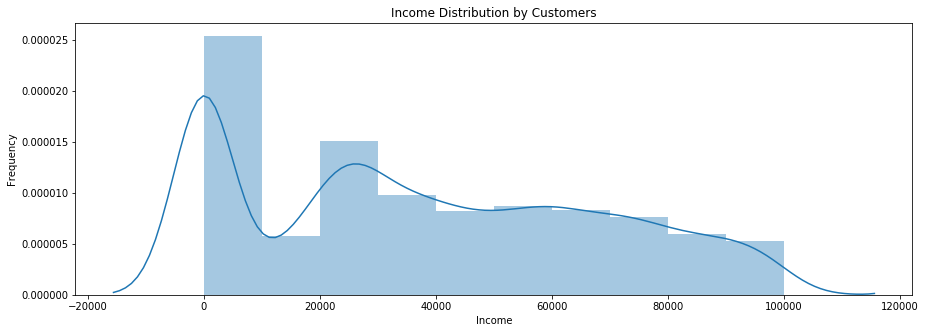

In [0]:
plt.rcParams['figure.figsize'] = (15,5)
df_Income = data[['Customer','Income']].copy()

df_Income.drop_duplicates(subset='Customer', keep='first', inplace=True)
sns.distplot(df_Income['Income'], bins=10)
plt.title('Income Distribution by Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

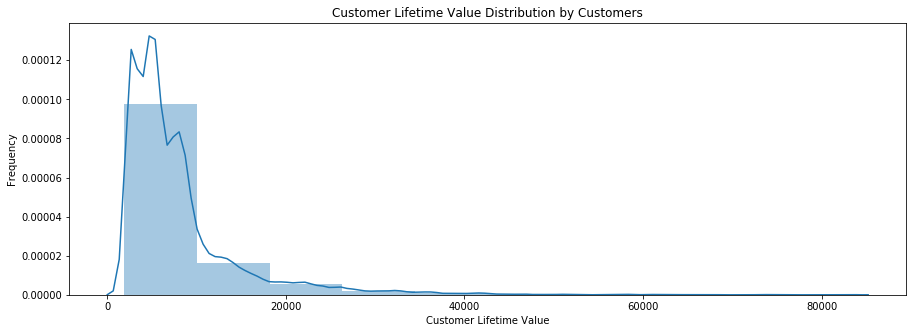

In [0]:
plt.rcParams['figure.figsize'] = (15,5)
df_Income = data[['Customer','Customer Lifetime Value']].copy()

df_Income.drop_duplicates(subset='Customer', keep='first', inplace=True)
sns.distplot(df_Income['Customer Lifetime Value'], bins=10)
plt.title('Customer Lifetime Value Distribution by Customers')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()